Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')

# 나이 칼럼은 존재하지 않으므로 생일 칼럼을 이용하여 산술 연산

# 월급 결측치 개수 구하기 before
12030

# 월급 결측치 개수 구하기 after
0

# merge() 활용하여 병합
[1 7 2 5 6 3 4]
   age ageg
0   79   노년
1   85   노년
2   65   노년
3   65   노년
4   49   중년
Index(['성별', '생일', '결혼 유무', '종교', '직업 코드', '소득', 'code_religion', '나이', '직업',
       '연령대'],
      dtype='object')
   성별    생일 결혼 유무  종교  직업 코드          소득 code_religion  나이  \
0  남성  1948   무응답  없음  942.0  120.000000            서울  79   
1  남성  1942    이혼  있음  762.0  200.000000            서울  85   
2  남성  1962    결혼  있음  530.0  241.619016            서울  65   
3  남성  1962   무응답  없음  999.0   40.000000            서울  65   
4  남성  1978    결혼  없음  312.0  350.000000            서울  49   
5  여성  1975    결혼  없음  254.0  200.000000            서울  52   
6  여성  1942    결혼  있음  510.0  150.000000            서울  85   
7  남성  1964   무응답  없음  530.0  241.619016            서울  63   
8  남성  1

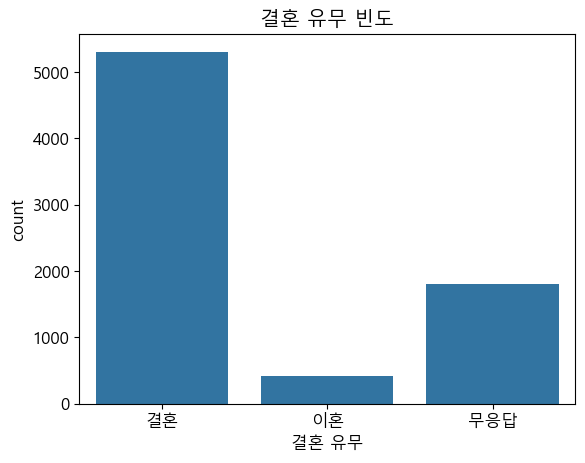

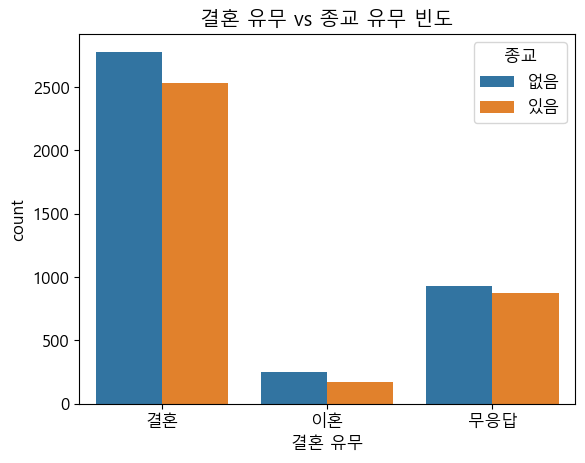

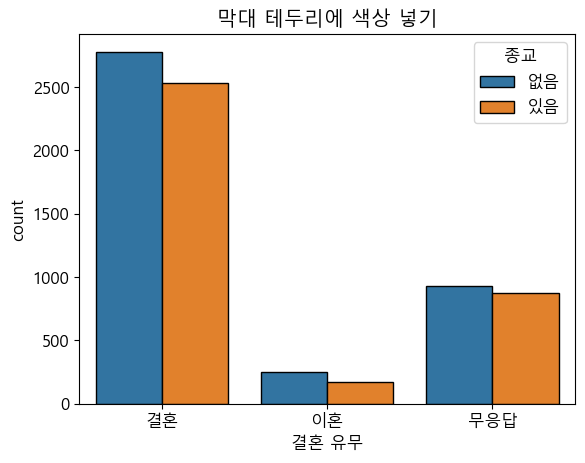

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rc('font', family = "Malgun Gothic")
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.unicode_minus'] = False

CHART_NAME = 'sebornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = './../data/welfare_python.csv'

welfare = pd.read_csv(filename, encoding='utf-8')

print(welfare.columns) # welfare의 칼럼 정보 출력

# 데이터 전처리: 가독성 향상
# gender 칼럼의 값을 문자열로 치환
welfare.loc[welfare['gender'] == 1, ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2, ['gender']] = '여성'

print('\n# 나이 칼럼은 존재하지 않으므로 생일 칼럼을 이용하여 산술 연산')
thisyear = 2026
welfare['age'] = thisyear - welfare['birth'] + 1

def setMarriage(x):
    if(x == 1):
        return '결혼'
    elif(x == 3):
        return '이혼'
    else:
        return '무응답' #결측치
welfare['marriage'] = welfare['marriage'].apply(setMarriage)

print('\n# 월급 결측치 개수 구하기 before')
print(sum(welfare['income'].isnull()))

welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean() #결측치를 월급 열의 비결측치의 평균값으로 치환

print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))
# 종교 칼럼의 값을 문자열로 치환 
# unique()활용하여 추출한 종교 칼럼의 값 : (2, 1)
def setReligion(x):
    if (x == 1):
        return '있음'
    elif (x == 2):
        return '없음'
welfare['religion'] = welfare['religion'].apply(setReligion)



# welfare엔 직업 이름이 존재 하지 않기 때문에 job파일을 읽어서
# jobname을 담은 jobframe 생성
job_file = './../data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding='cp949')

# welfare와 jobframe 병합하기
print('\n# merge() 활용하여 병합')
welfare = pd.merge(welfare, jobframe, left_on='code_job', right_on='code_job')
# print(welfare)

# code_religion 칼럼 문자열로 치환
print(welfare['code_religion'].unique())

def setReligion_txt(x):
    if x == 1:
        return '서울'
    elif x == 2:
        return '수도권'
    elif x == 3:
        return '부산/울산/경남'
    elif x == 4:
        return '대구/경북'
    elif x == 5:
        return '대전/충남'
    elif x == 6:
        return '강원/충북'
    else:
        return '광주/전남/전북/제주도'
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)

def newAge(x):
    if x < 30 : 
        return '청년'
    elif x >= 30 and x <= 60:
        return '중년'
    else :
        return '노년'
    
welfare['ageg'] = welfare['age'].apply(newAge)
print(welfare[['age', 'ageg']].head())

# 칼럼 이름을 한글로 변경
col_mapping = {'gender':'성별', 'birth':'생일', 'marriage':'결혼 유무', 'religion':'종교', 'code_job':'직업 코드', 'income':'소득',
               'code_religtion':'지역구', 'age':'나이', 'job':'직업', 'ageg':'연령대'}
welfare = welfare.rename(columns=col_mapping)
welfare.to_csv('welfareClean.csv', index=False, encoding='cp949')

print(welfare.columns)
print(welfare.head(10))

print(welfare.describe())

# 그래프 저장 함수
def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')

# 결혼 유무의 빈도수를 활용하여 그래프 그리기
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
print(result)

import seaborn as sns
ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')
sns.countplot(x='결혼 유무', data=welfare, order=ORDERING)
FileSave()

plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')
welfare.groupby(['결혼 유무', '종교'])['결혼 유무'].count()

sns.countplot(x='결혼 유무', hue='종교', data=welfare, order=ORDERING)
FileSave()

plt.figure()
plt.title('막대 테두리에 색상 넣기')
sns.countplot(x='결혼 유무', hue='종교', data=welfare, order=ORDERING, linewidth=1, edgecolor='black')
FileSave()

sebornWelfare_29.png파일이 저장되었습니다.


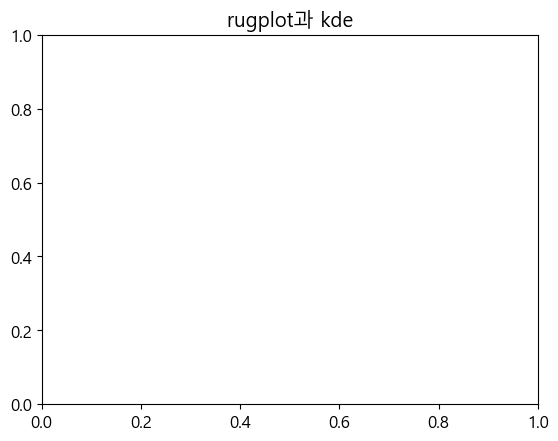

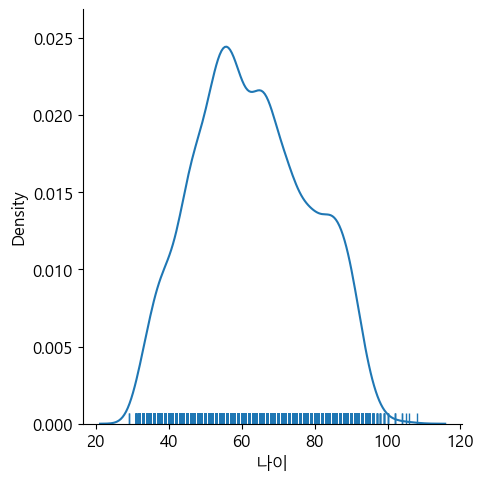

In [48]:
# # 히스토그램 (distplot) -> 구버전
x = welfare['나이']
# plt.figure()
# plt.title('rugplot과 kde') #kde:분포 곡선
# sns.distplot(x, rug=True, hist=False, kde=True)
# FileSave()

# plt.figure()
# plt.title('kde와 histogram')
# sns.distplot(x, rug=False, hist=True, kde=True, label='asdf')
# FileSave()

# # 가로 방향 그리기
# plt.figure()
# plt.title('가로로 그리기')
# sns.distplot(x, vertical=True)
# FileSave()

# #color 매개변수 사용
# plt.figure()
# plt.title('컬러 바꾸기')
# sns.distplot(x, color='m')
# FileSave()

# # 최신버전 히스토그램
# # 히스토그램 없이 kde만 그리기
# plt.figure()
# plt.title('rugplot과 kde')
# # 1. kde 그리기
# sns.kdeplot(x)
# # 2. 러그(데이터 위치 표시) 그리기 - 별도 호출
# sns.rugplot(x)
# FileSave()
# displot을 사용하여 kde만 그리기
# displot은 자체적인 figure를 생성하기 때문에 plt.title()을 무시함
sns.displot(x, kind='kde', rug=True) # hist=False와 동일한 역할
FileSave()

상관관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000
sebornWelfare_31.png파일이 저장되었습니다.


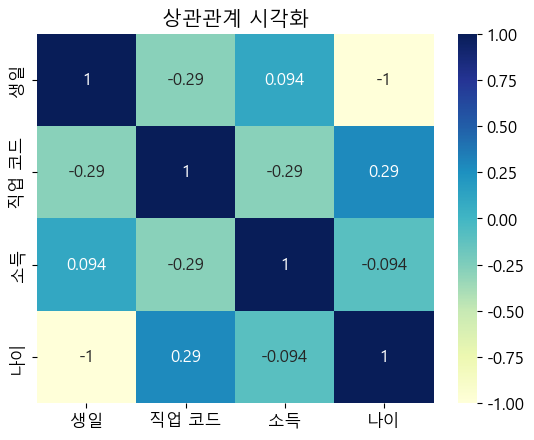

In [53]:
# 히트맵
# pivot table: 데이터를 하나 이상의 키로 구분해서 어떤 키는 row에 어떤 키는 column에 나열하여 데이터를 정렬
# welfare를 활요하여 피벗테이블 생성
# pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
# print('pvibot table')
# print(pivot)

# 히트맵 그리기
# plt.figure()
# plt.title('결혼 유무와 성별에 대한 히트맵')
# sns.heatmap(data=pivot, annot=True)
# FileSave()

# corr()활용하여 상관 관계 시각화
cor = welfare.corr(numeric_only=True) #교재에는 구버전으로 기재되어 있음 지금은 numeric_only=True를 적용해야 함
print('상관관계 시각화')
print(cor)

plt.figure()
plt.title('상관관계 시각화')
sns.heatmap(data=cor, annot=True, cmap='YlGnBu')
FileSave()

sebornWelfare_36.png파일이 저장되었습니다.


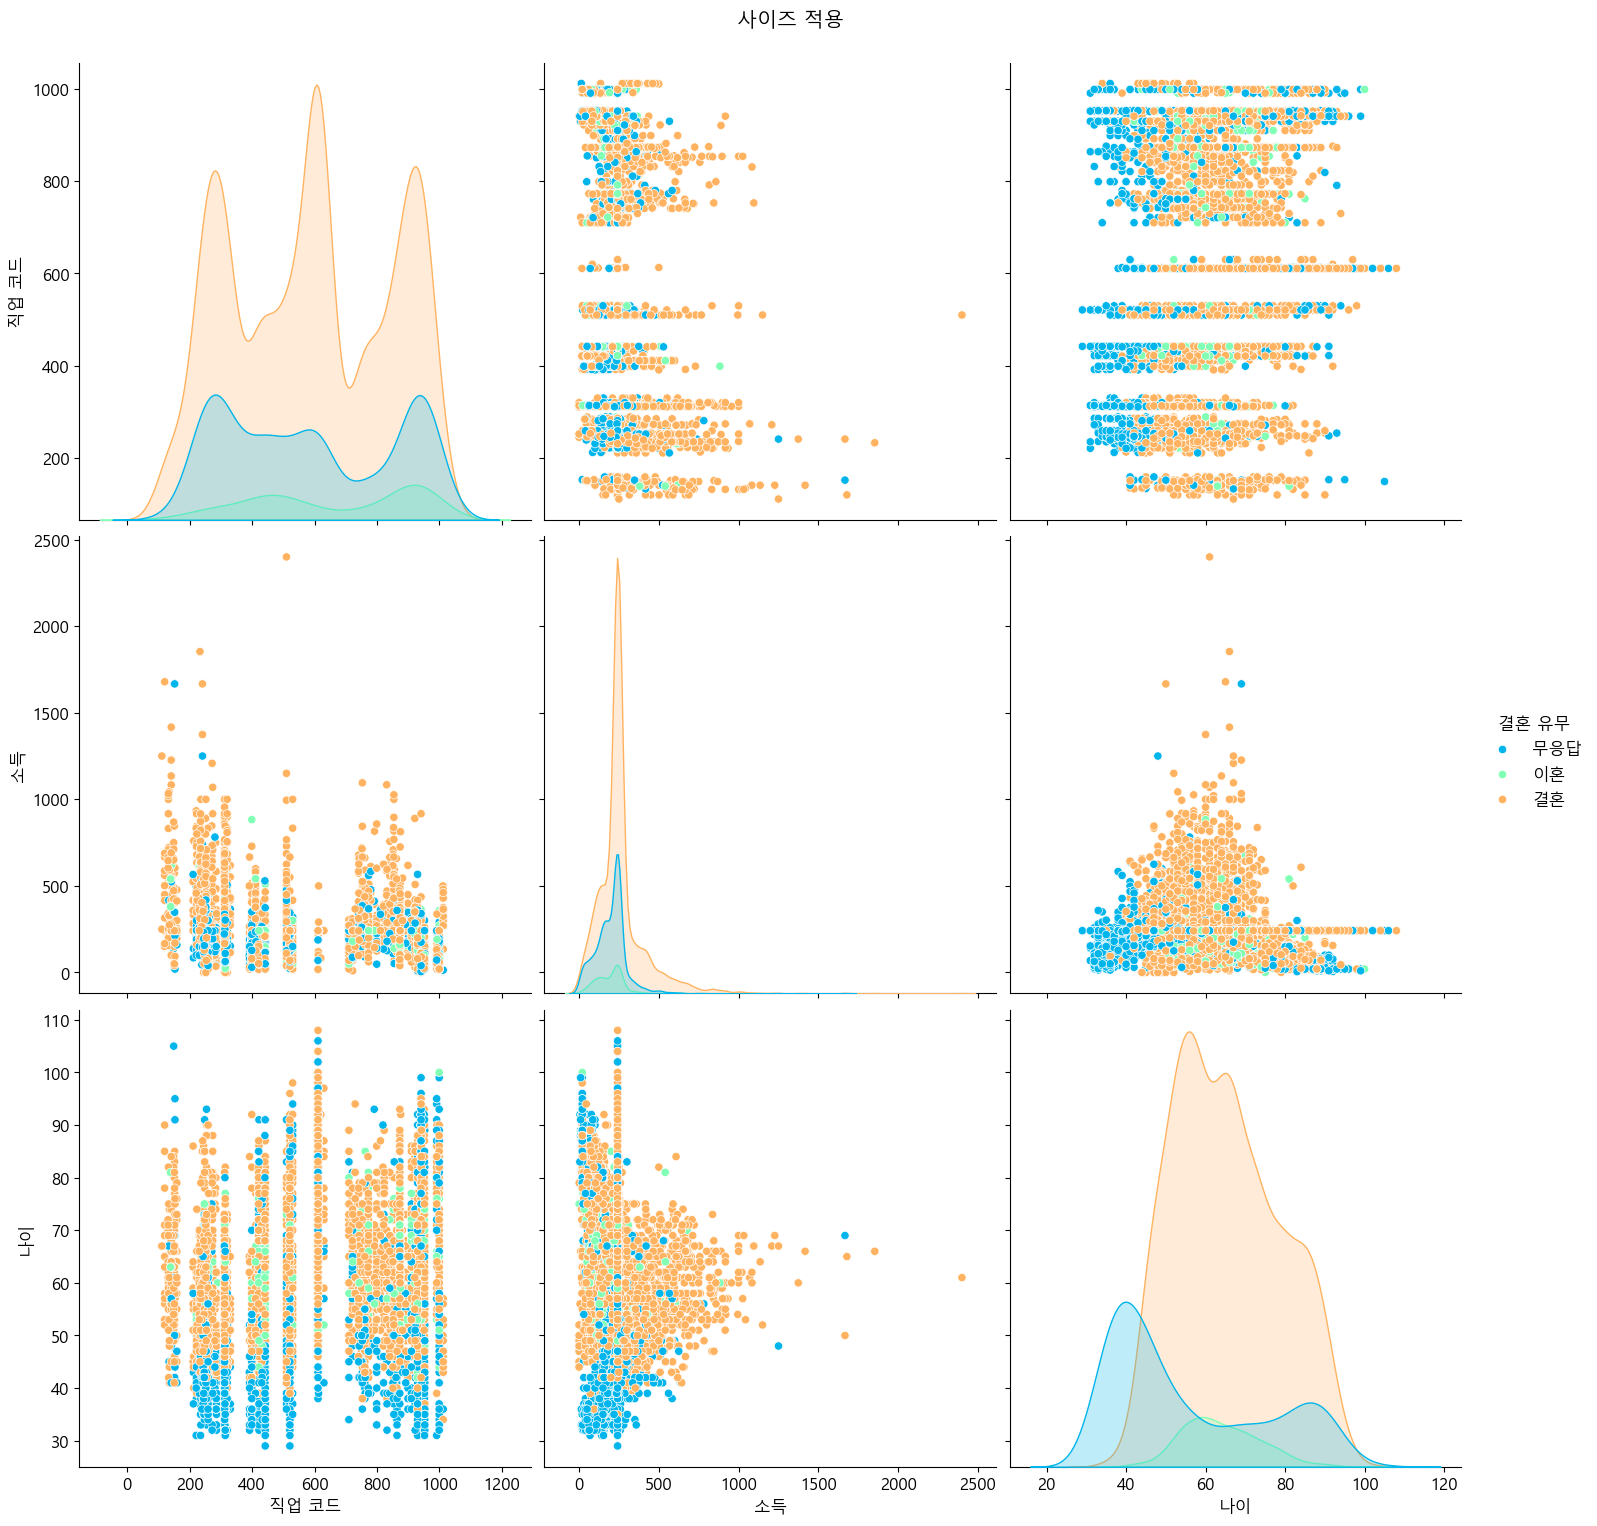

In [59]:
# 두 칼럼간의 짝 그래프 (pairplot)
# 3 차원 이상의 다차원 실수형 데이터인 경우 활용, 숫자형 칼럼에 대해서만 가능
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

# grid = sns.pairplot(data=newwelfare) 
# # pairplot은 plt.figure와 관계없이 새 figure를 생성
# grid.figure.suptitle('기본 pairplot', y=1.02)
# FileSave()

#hue 옵션
# grid = sns.pairplot(data=newwelfare, hue='결혼 유무', palette='rainbow')
# grid.figure.suptitle('hue옵션으로 특성 구분', y=1.02)
# FileSave()

# facet 높이를 inches값으로 지정
grid = sns.pairplot(data=newwelfare, hue='결혼 유무', palette='rainbow', height=5,)
grid.figure.suptitle('사이즈 적용', y=1.02)
FileSave()

sebornWelfare_40.png파일이 저장되었습니다.


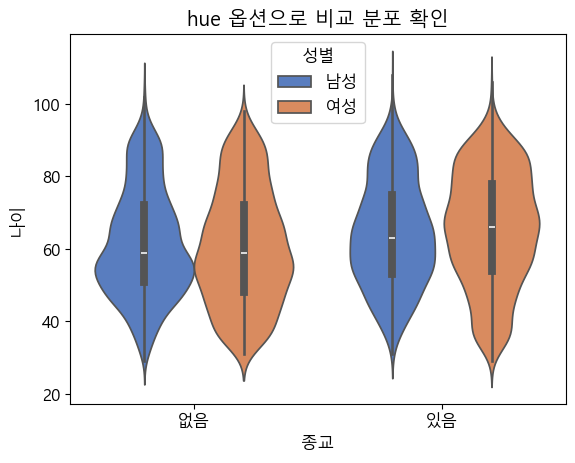

In [ ]:
# 바이올린 그래프
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x='나이', data=welfare)
FileSave()

# x,y 축 지정으로 바이올린 분할 비교
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x='성별', y='나이', data=welfare) # x, y축을 변경하면 가로 형태
FileSave()

# hue 옵션으로 분포 비교
plt.figure()
plt.title('hue 옵션으로 비교 분포 확인')
sns.violinplot(x='종교', y='나이', hue='성별', data=welfare, palette='muted')
FileSave()

sebornWelfare_44.png파일이 저장되었습니다.


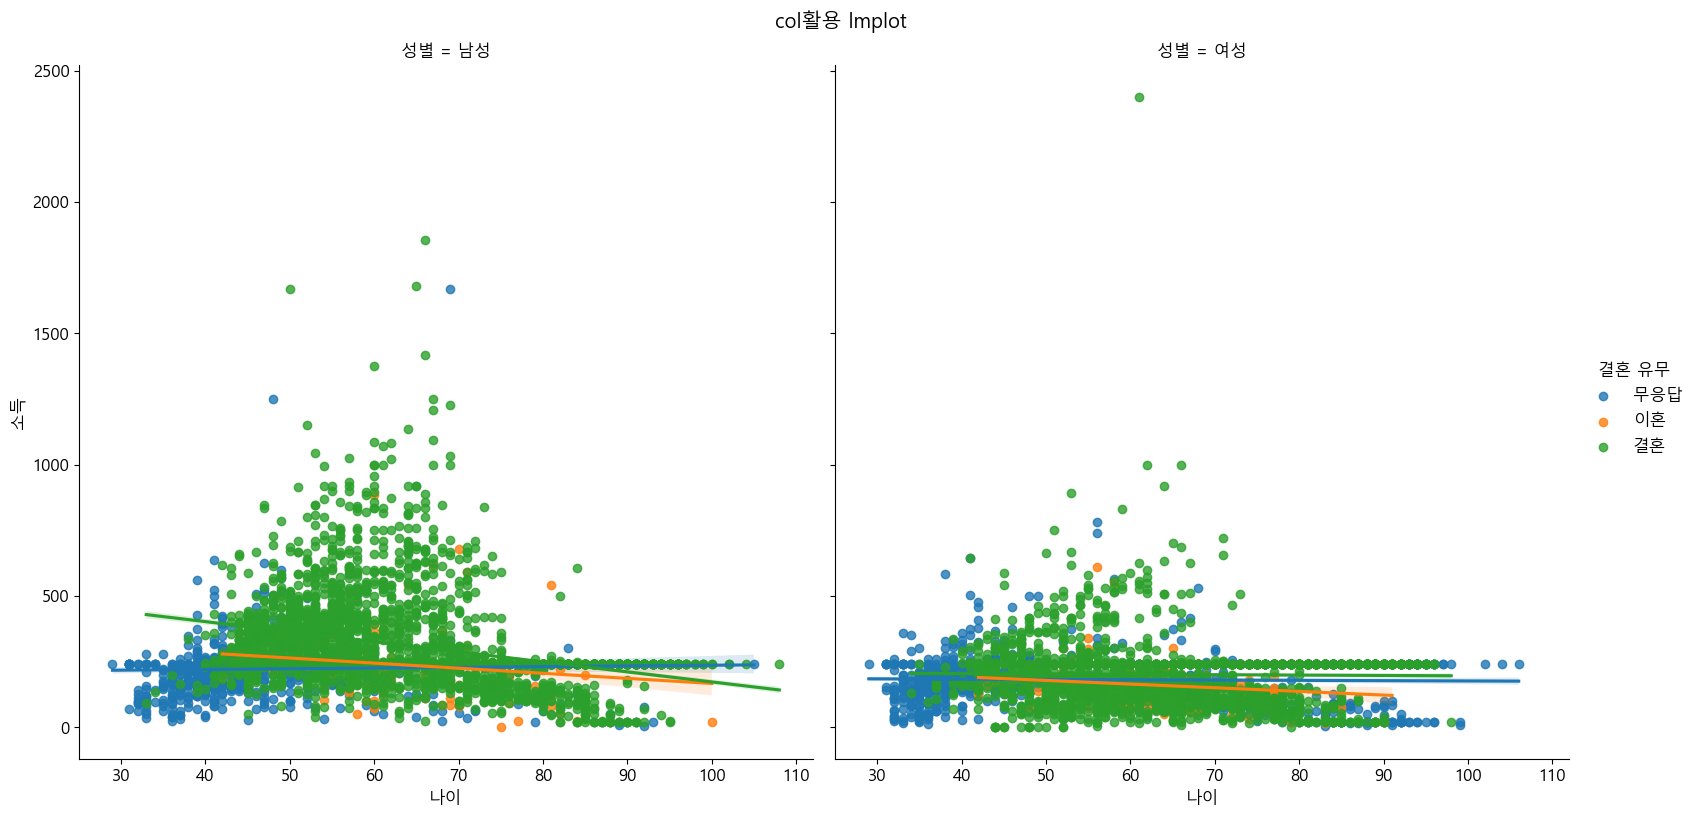

In [ ]:
# 선형 회귀 모델 그래프(Implot), 칼럼 간의 선형적이 관계를 확인
g = sns.lmplot(x='나이', y='소득', height = 8, data=welfare)
g.figure.suptitle('기본 implot', y=1.02)
FileSave()

# #hue옵션
g = sns.lmplot(x='나이', y='소득', hue='결혼 유무', height = 8, data=welfare)
g.figure.suptitle('hue활용 lmplot', y=1.02)
FileSave()

# col 매개변수를 사용하여 항목별 그래프를 별도로 그릴 수 있다.
# col_wrap으로 한 줄에 표기할 칼럼의 갯수를 명시할 수 있다.
g = sns.lmplot(x='나이', y='소득', hue='결혼 유무', col='성별', col_wrap=2, height = 8, data=welfare)
g.figure.suptitle('col활용 lmplot', y=1.02)
FileSave()

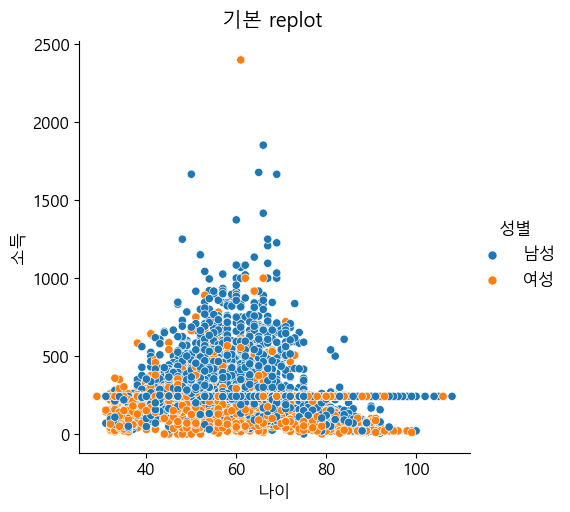

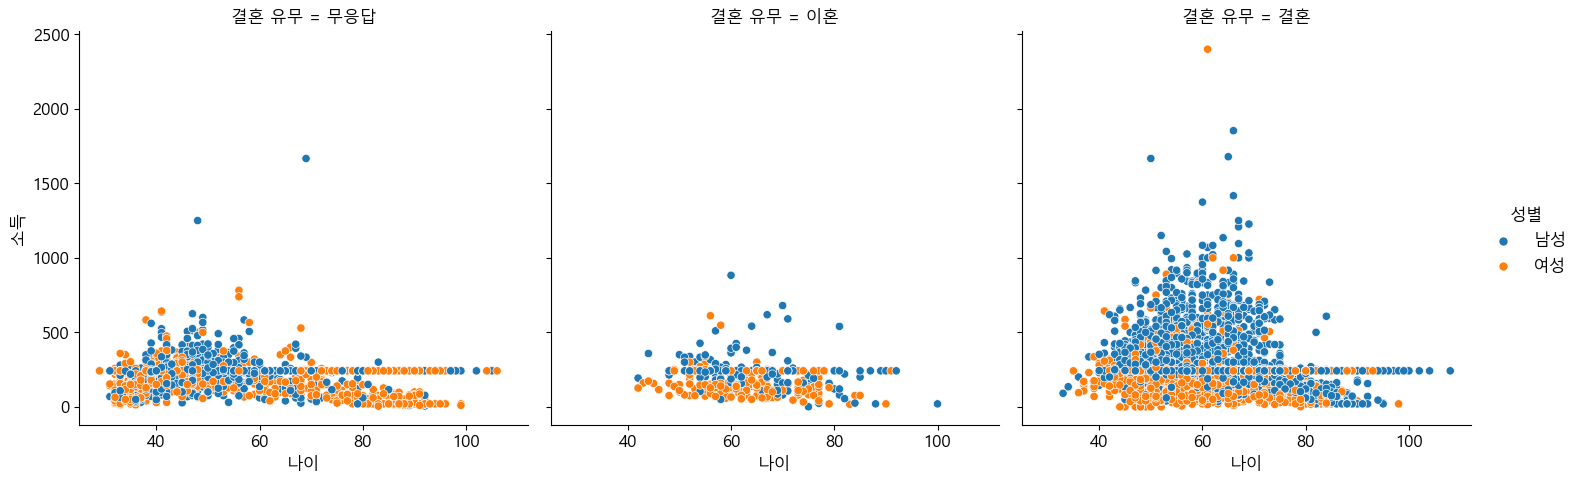

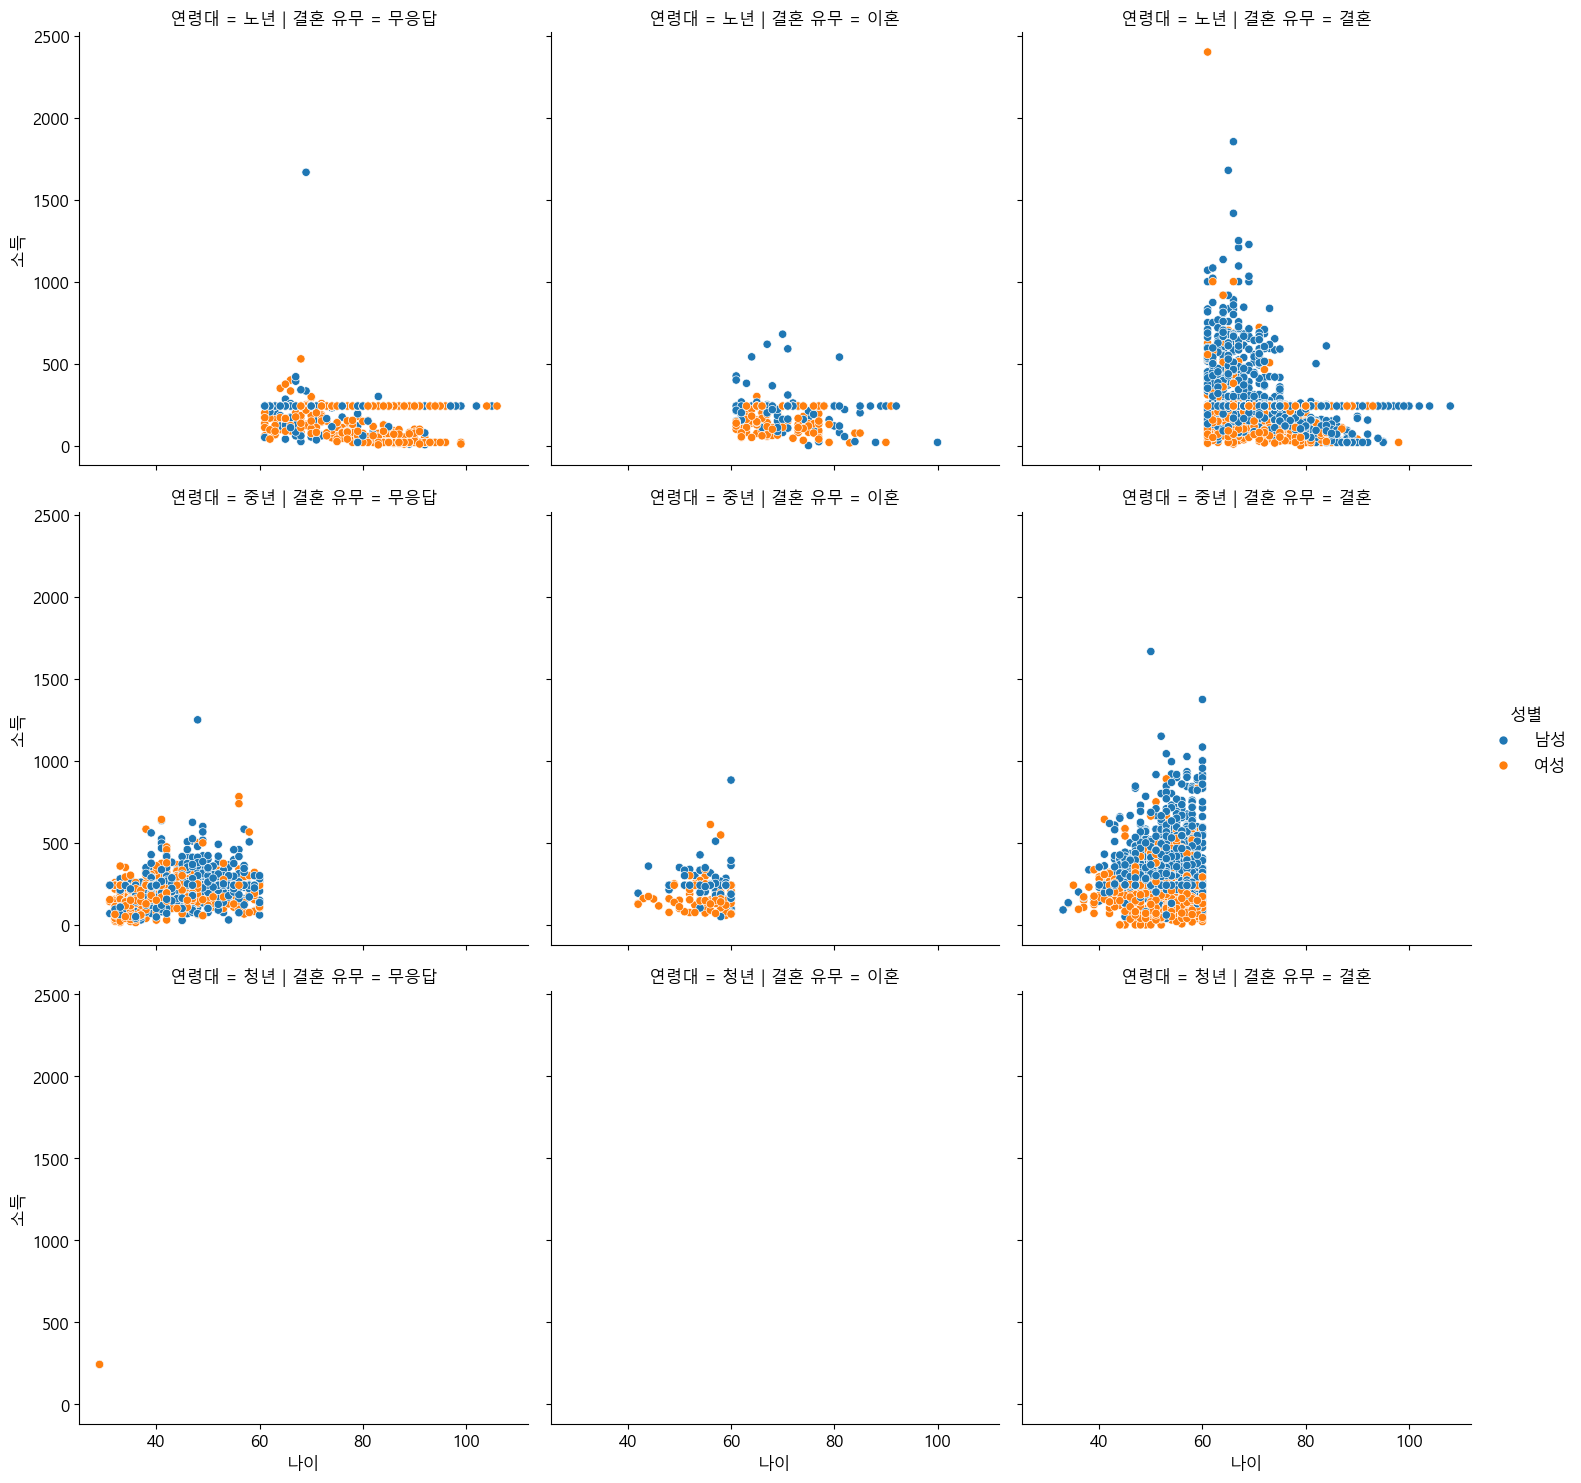

In [104]:
# 산점도 (relplot)
grid = sns.relplot(x='나이', y='소득', hue='성별', data=welfare)
grid.figure.suptitle('기본 replot', y=1.02)

# col 활용하여 범주형 데이터 개수 만큼 그래프그리기
grid = sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무',data=welfare)

# row 매개변수 활용
grid = sns.relplot(x='나이', y='소득', hue='성별', row='연령대', col='결혼 유무', data=welfare)

Text(0.5, 1.02, '등고선 모양으로 밀집도 확인')

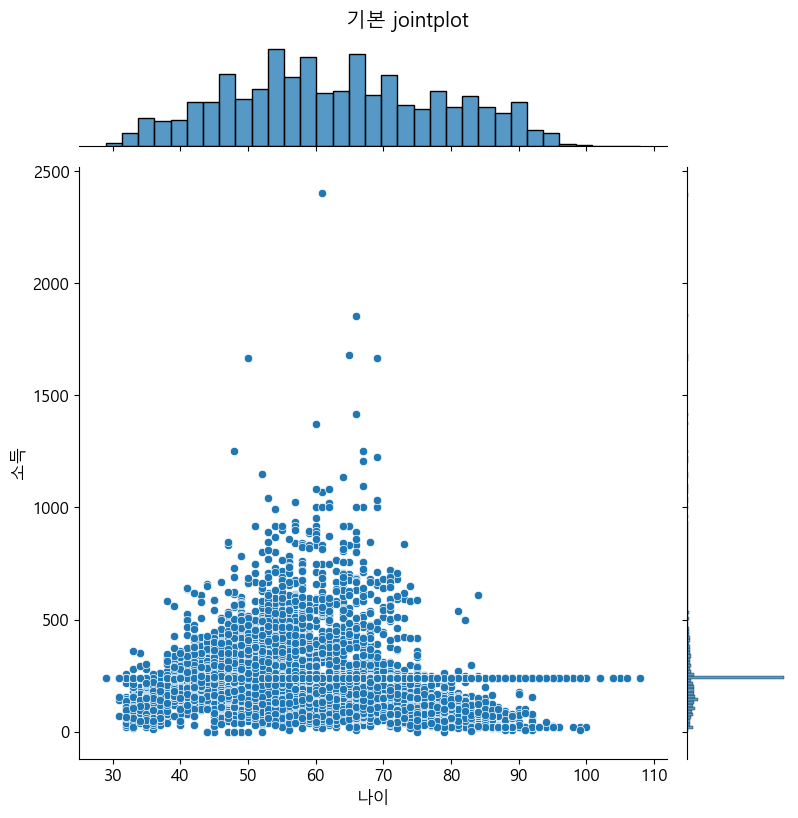

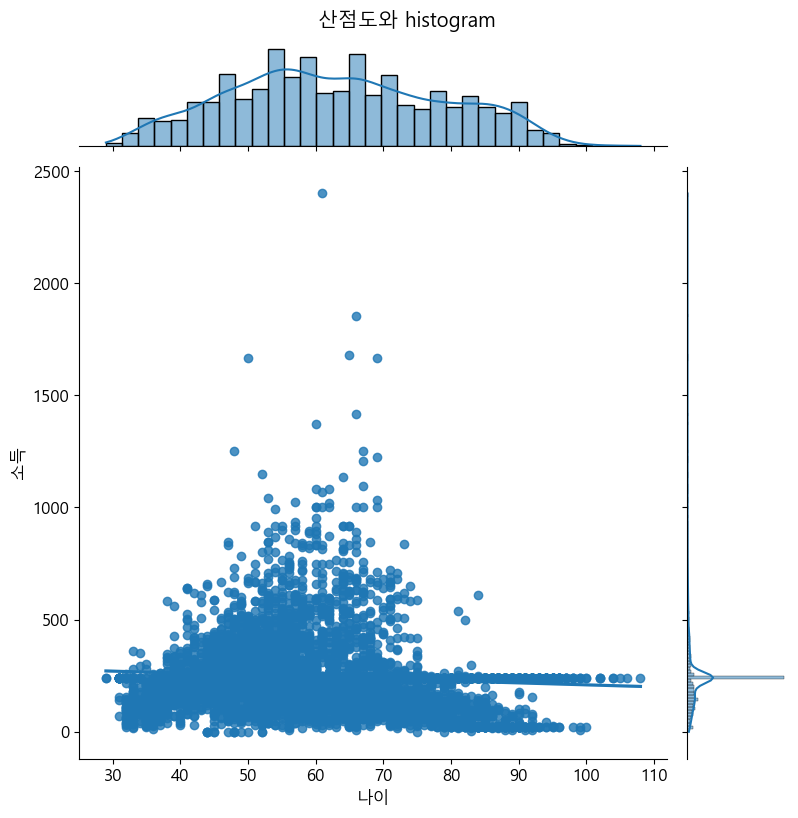

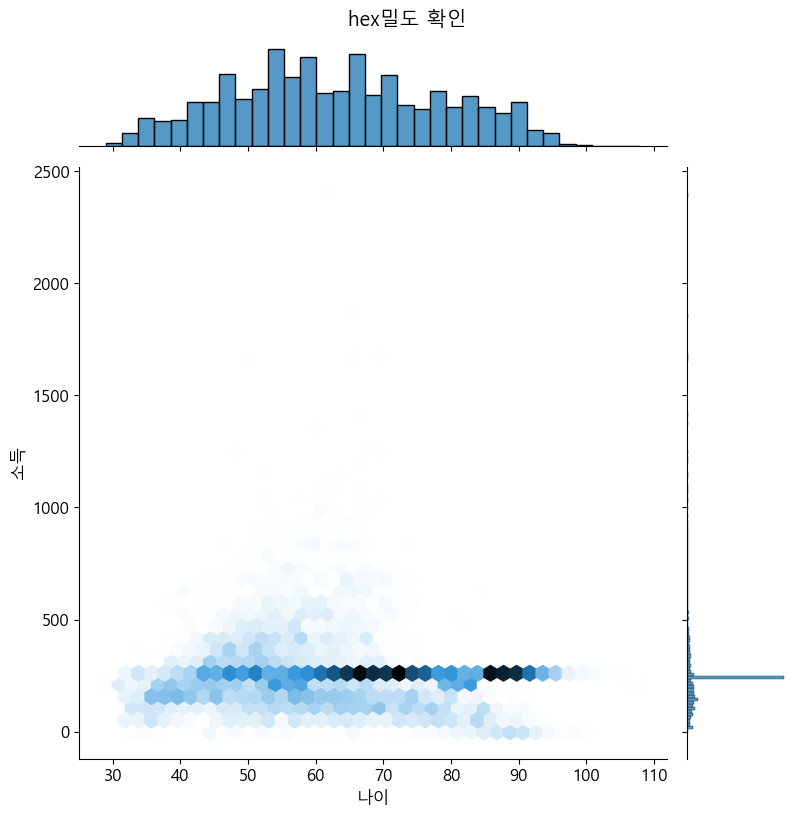

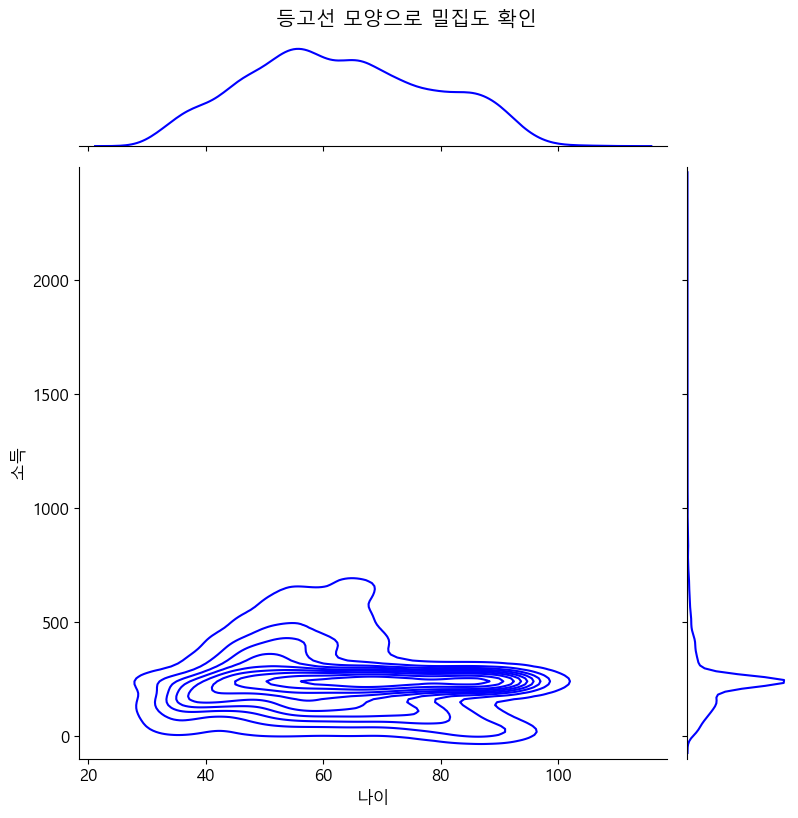

In [ ]:
# 산점도와 히스토그램(jointplot)
# jointplot은 숫자형 데이터마 표현 가능
g = sns.jointplot(x='나이', y='소득', height=8, data=welfare)
g.figure.suptitle('기본 jointplot', y=1.02)
# 회귀선 표시
g = sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind='reg')
g.figure.suptitle('산점도와 histogram', y=1.02)

# 육각형 모양의 밀도 확인
g = sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind='hex')
g.figure.suptitle('hex밀도 확인', y=1.02)

# kde옵션으로 밀집도를 선으로 표시
g = sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind='kde', color='b')
g.figure.suptitle('등고선 모양으로 밀집도 확인', y=1.02)

Text(0, 0.5, '성별')

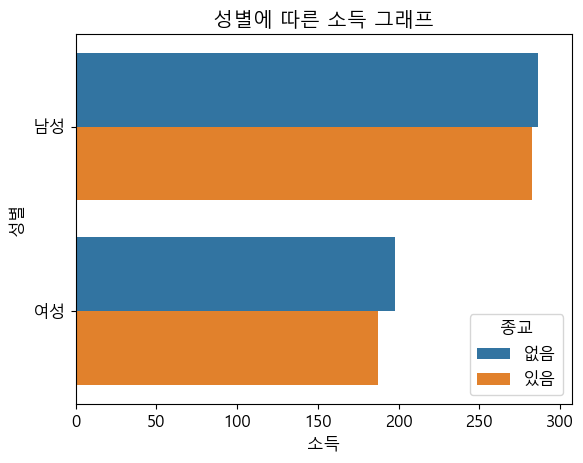

In [ ]:
# barplot 막대 그래프를 그려 주는 함수
ax = plt.subplot()
ax = sns.barplot(x='성별', y='소득',  data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

# hue 매개 변수 사용
ax = plt.subplot()
ax = sns.barplot(x='성별', y='소득', hue='종교', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

# 가로로 그리기
ax = plt.subplot()
ax = sns.barplot(x='소득', y='성별', hue='종교', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('소득')
ax.set_ylabel('성별')

Text(0, 0.5, '소득')

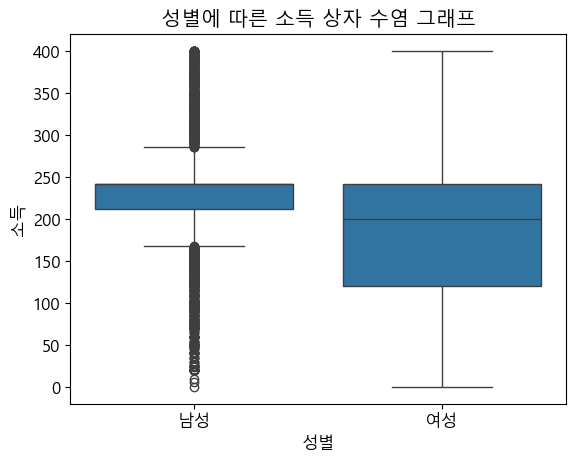

In [ ]:
# # 상자 수염 그래프 boxplot
# ax = plt.subplot()
# ax= sns.boxplot(x='성별', y='소득', data=welfare)
# ax.set_title('성별에 따른 소득 상자 수염 그래프')
# ax.set_xlabel('성별')
# ax.set_ylabel('소득')

# 이상치 제거
newwelfare = welfare.loc[welfare['소득'] <= 400]
# ax = plt.subplot()
# ax= sns.boxplot(x='성별', y='소득', data=newwelfare)
# ax.set_title('성별에 따른 소득 상자 수염 그래프')
# ax.set_xlabel('성별')
# ax.set_ylabel('소득')

Text(0, 0.5, '나이')

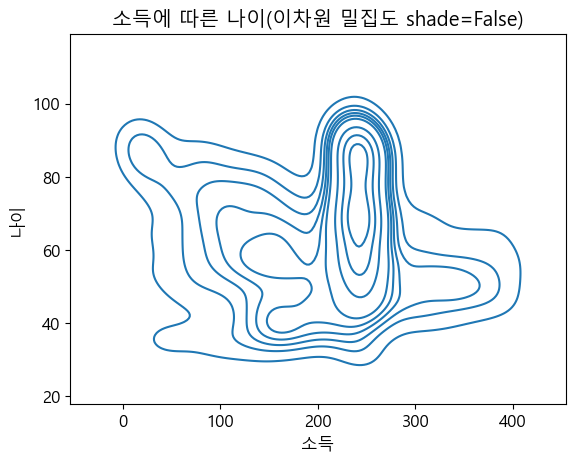

In [98]:
#  kdeplot 이차원 밀집도
#  확률밀도를 이산화되어 있는 변수를 연속적으로 나타나게 만드는 그래프
# 교재의 data, data2, shade 매개변수는 구버전으로 현재는 사용x
# ax = plt.subplots()
# ax = sns.kdeplot(x=newwelfare['소득'],
#                  y=newwelfare['나이'],
#                  fill=True)
# ax.set_title('소득에 따른 나이(이차원 밀집도 shade=True)')
# ax.set_xlabel('소득')
# ax.set_ylabel('나이')

# fill-False면
ax = plt.subplots()
ax = sns.kdeplot(x=newwelfare['소득'],
                 y=newwelfare['나이'],
                 fill=False)
ax.set_title('소득에 따른 나이(이차원 밀집도 shade=False)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')